> Code to accompany **Chapter 6: Methods for Generating Adversarial Perturbation**

# Experimenting with a Random (naive) attack

This Jupyter notebook tests how difficult it would be to create an adversarial image by chance using random perturbation.

In [1]:
# Import the model
import tensorflow as tf
from tensorflow import keras
from keras.applications.resnet50 import ResNet50

# Import helper function
import sys
sys.path.append('..')
from strengtheningdnns.image_utils import image_from_file

# Get the ResNet50 network using the imagenet trained weights
model = ResNet50(weights='imagenet', include_top=True)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


## Import the pre-trained ResNet50 Model

## Select our image and get its predictions

First select the image and resize it.

(?, ?, ?)
Re-scaling image to  [224, 224]


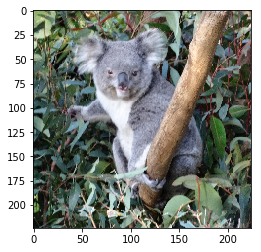

In [2]:
import matplotlib.pyplot as plt

image_path = '../images/koala.jpg'
image = image_from_file(image_path, [224,224])

plt.imshow(image)


In [3]:
from keras.applications.resnet50 import preprocess_input
image_for_resnet = preprocess_input(image)

In [4]:
from keras.applications.resnet50 import decode_predictions

%matplotlib inline
import numpy as np

image_for_resnet_list = np.expand_dims(image_for_resnet, 0)

decoded_predictions = decode_predictions(model.predict(image_for_resnet_list), top=3)
label = np.argmax(model.predict(image_for_resnet_list))

for pred in decoded_predictions[0]:
    print(pred[1], ':', pred[2])


koala : 0.9999783
wombat : 1.2013323e-05
indri : 5.9872136e-06


## Incrementally add random perturbation

In [19]:
max_perturb = 40 # This is maximum perturbation increase or decreased

In [20]:
num_iterations = 12
perturbed_images = np.empty((num_iterations,224,224,3),dtype=int)
new_image = image
perturbed_images[0] = new_image
for i in range(num_iterations-1):
    r = np.random.RandomState(i)
    new_image_unclipped = new_image + r.randint(-(max_perturb+1), max_perturb+1, size=(224,224,3))
    # Clip the image so that it doesn't include pixel values outside 0 and 255
    new_image = np.clip(new_image_unclipped, 0,255)
    perturbed_images[i+1] = new_image

In [21]:
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import decode_predictions

images_for_resnet = preprocess_input(perturbed_images)
predictions = model.predict(images_for_resnet)
decoded_predictions = decode_predictions(predictions, top=3)

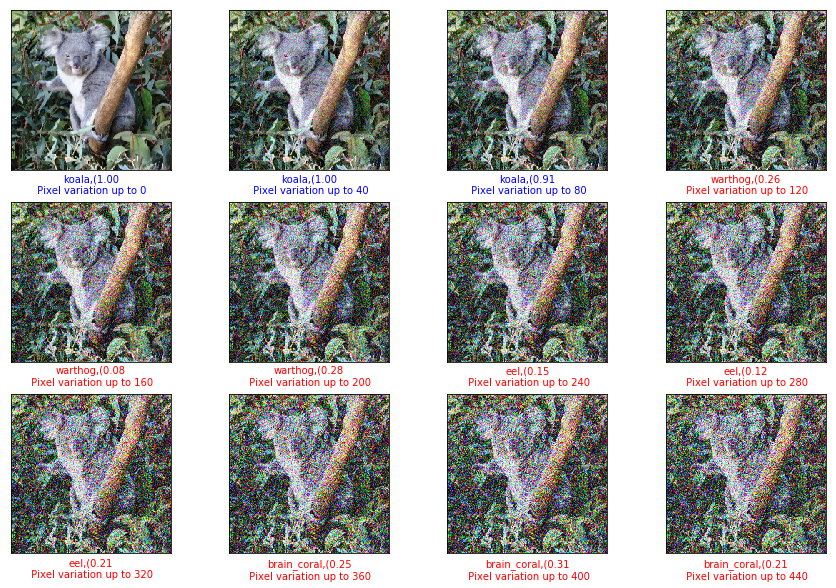

In [24]:
plt.figure(figsize=(15, 10))
for i in range(num_iterations):
    plt.subplot(3,4,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(perturbed_images[i])
    predicted_label = np.argmax(predictions[i])
    if predicted_label == label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{},({:.2f}\n Pixel variation up to {}".format(decoded_predictions[i][0][1],
                                    decoded_predictions[i][0][2], i*max_perturb),
                                    color=color) 
plt.savefig("ch6_code_random_attack.pdf", format='pdf', dpi=1000)

## Where next?

Perform a real attack on the image::

* The Foolbox saliency attack using the ResNet50 classifier. Here's the [Jupyter notebook on GitHub](https://github.com/katywarr/strengthening-dnns/blob/master/chapter06/resnet50_foolbox_saliency.ipynb) and here's the [relative path to the Jypyter notebook](./resnet50_foolbox_saliency.ipynb) if you want to run it.

There are many more examples of adversarial attacks online. See [RESOURCES.md](https://github.com/katywarr/strengthening-dnns/blob/master/RESOURCES.md) for links to collaborative projects for creating and defending against attacks.